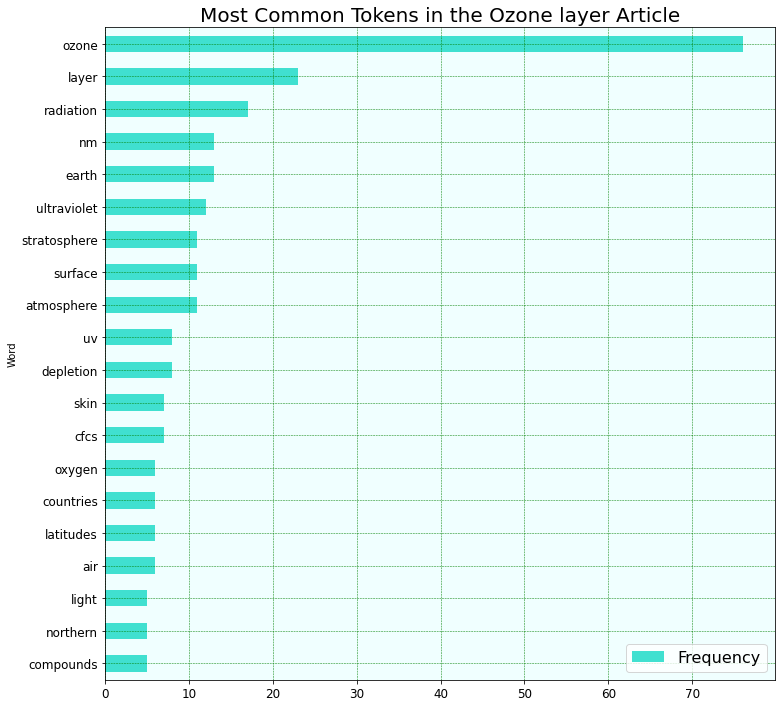

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from io import StringIO

#Part 1 - Extract
def get_content(name):
    
    page = requests.get("https://en.wikipedia.org/wiki/" + name)
    
    return page 

data = get_content("Ozone_layer")


def merge_contents(data):
    page = data.text
    soup = BeautifulSoup(page, 'html.parser')
    text = ''
    
    for paragraph in soup.find_all('p'):
        text += paragraph.text
    
    return text

merge_content = merge_contents(data)


def tokenize(content):
    # Text cleaning
    # Deleting words in [] - links
    content = re.sub("[\[].*?[\]]", "", content)
    # Some cleaning
    content = content.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace('.', '').replace(',', '').replace('>', '').replace('<', '').replace(':', '').replace("'s", '').replace('[', '').replace('{', '').replace("\\", '')
    
    return content
    
collection = tokenize(merge_content)


def lower_collection(collection):
    collection = collection.lower()
    return collection

collection = lower_collection(collection)


def remove_stop_words(words, stop_words):
    str1 = words.split()
    res = [i for i in str1 if i not in stop_words]
    
    return res

stop_words = ["the", "of", "and", "in", "to", "is", "most", "between", "a", "an", "by", "that", "where", "we", "if" "are", "was", "be", "from", "as", "about", "have", "at", "for", "this", "it", "are", "with", "these", "if", "has", "on", "which", "because", "into", "can", "over", "being", "were", "or", "an", "its", "other", "all", "out", "used", "also", "been", "near", "not", "alhough", "since", "less", "than", "while", "above", "so", "due", "could", "after", "per", "with", "until"] 
filtered_collection = remove_stop_words(collection, stop_words)

def count_frequency(collection):       
    str2 = []
    dic1 = {}
 
    # loop till string values present in list str
    for i in collection:            
        # checking for the duplicacy
        if i not in str2:
            # insert value in str2
            str2.append(i)
             
    for i in range(0, len(str2)):
        # count the frequency of each word(present
        # creating dictionary & counting occurences
        dic1[str2[i]] = collection.count(str2[i])

    return dic1
    
frequencies = count_frequency(filtered_collection)

def print_most_frequent(dataset, n):
    # Creating pandas dataframe s from a dictionary
    s = pd.Series(dataset, name='Frequency')
    s.index.name = 'Word'
    s = s.reset_index()
    s = s.sort_values(by = "Frequency", ascending = False)
    s.reset_index(drop=True, inplace=True)
    # Starting with 1 for convenience
    s.index = s.index + 1
    
    s = s.iloc[0:n] # first n rows of dataframe
    # print s 
    
    return s
   
data = print_most_frequent(frequencies, 20)


def plot_bar_diagram_frequent_tokens(dataset):
    
    df_sorted = dataset.sort_values('Frequency', ascending = True)
    #horizontal bar diagram
    ax = df_sorted.plot.barh(x = 'Word', y = 'Frequency', rot = 0, color = 'turquoise', figsize=(12, 12), fontsize = 12)
    ax.set_facecolor("azure") #background color
    
    plt.title("Most Common Tokens in the Ozone layer Article", fontsize = 20)
    plt.legend(fontsize=16)
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plot_bar_diagram_frequent_tokens(data)